<a href="https://colab.research.google.com/github/rh2098ta/practicalapplication2/blob/main/practicalassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('vehicles.csv')
df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [2]:
# shape, columns, nulls, data types
print(df.shape)
print(df.dtypes)
df.isnull().sum()


(426880, 18)
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


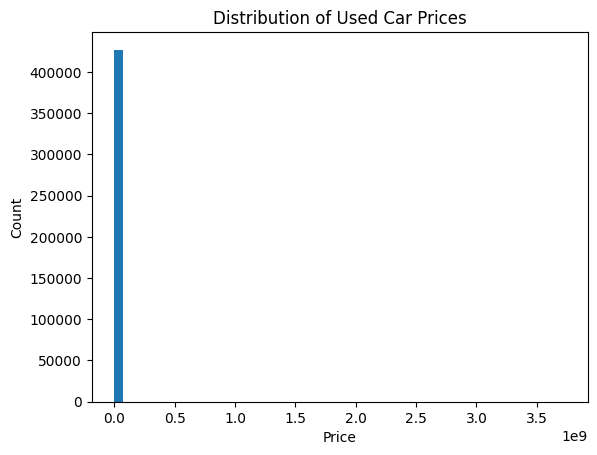

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=50)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [5]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
print(df['price'].dtype)
print(df['price'].describe())
df['price'].nlargest(10)


int64
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64


,price
318592,3736928711
356716,3736928711
91576,3024942282
257840,3024942282
37410,3009548743
184704,1410065407
153082,1234567890
29386,1111111111
37409,1111111111
280,987654321


In [6]:
df_price_ok = df[(df['price'] >= 500) & (df['price'] <= 200_000)].copy()


In [7]:
lo, hi = df['price'].quantile([0.01, 0.99])
df_price_ok = df[df['price'].between(lo, hi)].copy()
lo, hi


(0.0, 66995.0)

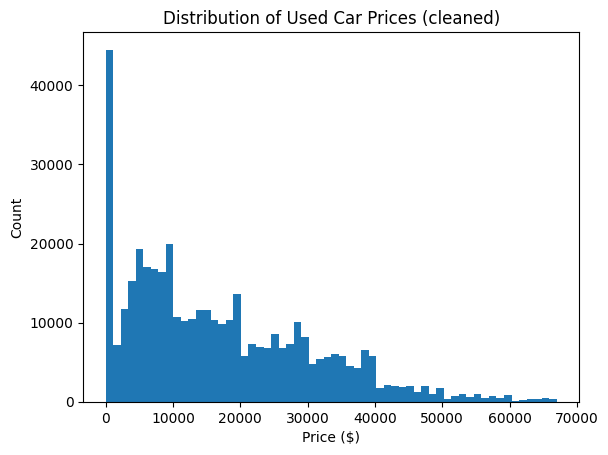

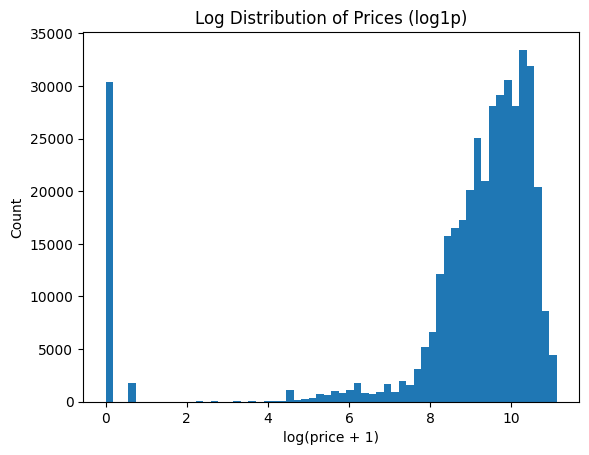

In [25]:
plt.hist(df_price_ok['price'], bins=60)
plt.title('Distribution of Used Car Prices (cleaned)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

plt.hist(np.log1p(df_price_ok['price']), bins=60)
plt.title('Log Distribution of Prices (log1p)')
plt.xlabel('log(price + 1)')
plt.ylabel('Count')
plt.show()


In [9]:
df_price_ok['odometer'] = pd.to_numeric(df_price_ok['odometer'], errors='coerce')
df_price_ok = df_price_ok[(df_price_ok['odometer'] >= 0) & (df_price_ok['odometer'] <= 400_000)]
df_price_ok = df_price_ok[(df_price_ok['year'] >= 1985) & (df_price_ok['year'] <= 2025)]


In [10]:
df_clean = df_price_ok.copy()
df_clean.info()
df_clean.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
Index: 406406 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            406406 non-null  int64  
 1   region        406406 non-null  object 
 2   price         406406 non-null  int64  
 3   year          406406 non-null  float64
 4   manufacturer  392969 non-null  object 
 5   model         402354 non-null  object 
 6   condition     242029 non-null  object 
 7   cylinders     237442 non-null  object 
 8   fuel          404268 non-null  object 
 9   odometer      406406 non-null  float64
 10  title_status  399152 non-null  object 
 11  transmission  404762 non-null  object 
 12  VIN           257615 non-null  object 
 13  drive         282868 non-null  object 
 14  size          114487 non-null  object 
 15  type          320238 non-null  object 
 16  paint_color   283809 non-null  object 
 17  state         406406 non-null  object 
dtypes: float

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.064060e+05,406406,406406.000000,406406.000000,392969,402354,242029,237442,404268,406406.000000,399152,404762,257615,282868,114487,320238,283809,406406
unique,NaN,404,NaN,NaN,41,26282,6,8,5,NaN,6,3,113978,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3494,NaN,NaN,66924,7759,117731,91400,340347,NaN,386498,322374,261,127033,59813,84732,76297,47320
mean,7.311480e+09,NaN,16847.934169,2012.267297,NaN,NaN,NaN,NaN,NaN,92533.444496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.384304e+06,NaN,13747.925489,6.071684,NaN,NaN,NaN,NaN,NaN,62784.614685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.301583e+09,NaN,0.000000,1985.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308108e+09,NaN,5950.000000,2009.000000,NaN,NaN,NaN,NaN,NaN,39253.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312580e+09,NaN,13900.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,87159.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315246e+09,NaN,25990.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,134571.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
features = ['year', 'odometer', 'manufacturer', 'model', 'condition', 'fuel',
            'transmission', 'type', 'paint_color', 'state']

df_model = df_clean[features + ['price']].dropna()
df_model.head()


,year,odometer,manufacturer,model,condition,fuel,transmission,type,paint_color,state,price
27,2014.0,57923.0,gmc,sierra 1500 crew cab slt,good,gas,other,pickup,white,al,33590
28,2010.0,71229.0,chevrolet,silverado 1500,good,gas,other,pickup,blue,al,22590
29,2020.0,19160.0,chevrolet,silverado 1500 crew,good,gas,other,pickup,red,al,39590
30,2017.0,41124.0,toyota,tundra double cab sr,good,gas,other,pickup,red,al,30990
31,2013.0,128000.0,ford,f-150 xlt,excellent,gas,automatic,truck,black,al,15000


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 5968.168557831177
RMSE: 8395.093787440814


In [13]:
ohe = model.named_steps['preprocess'].named_transformers_['cat']
encoded_cols = ohe.get_feature_names_out(categorical_features)

all_feature_names = list(encoded_cols) + numeric_features

coeffs = model.named_steps['regressor'].coef_

feature_importance = (
    pd.DataFrame({'feature': all_feature_names, 'coefficient': coeffs})
    .sort_values('coefficient', ascending=False)
)

feature_importance.head(15)


,feature,coefficient
11581,type_truck,4483.314204
11563,fuel_diesel,3727.052143
11579,type_pickup,3664.194558
11570,transmission_other,2430.599909
11594,paint_color_white,1512.715978
11578,type_other,1502.041045
13,manufacturer_gmc,1317.397657
32,manufacturer_ram,1316.266056
11584,paint_color_black,1144.046818
12,manufacturer_ford,941.697680


In [20]:
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)


ohe = model.named_steps['preprocess'].named_transformers_['cat']
encoded_cols = ohe.get_feature_names_out(categorical_features)
all_feature_names = list(encoded_cols) + numeric_features

coeffs = model.named_steps['regressor'].coef_

feature_importance = (
    pd.DataFrame({'feature': all_feature_names, 'coefficient': coeffs})
    .sort_values('coefficient', ascending=False)
)

print("\nTop 10 features increasing price:")
display(feature_importance.head(10))

print("\nTop 10 features decreasing price:")
display(feature_importance.tail(10))


MAE (Mean Absolute Error): 5968.168557831177
RMSE (Root Mean Squared Error): 8395.093787440814

Top 10 features increasing price:


,feature,coefficient
11581,type_truck,4483.314204
11563,fuel_diesel,3727.052143
11579,type_pickup,3664.194558
11570,transmission_other,2430.599909
11594,paint_color_white,1512.715978
11578,type_other,1502.041045
13,manufacturer_gmc,1317.397657
32,manufacturer_ram,1316.266056
11584,paint_color_black,1144.046818
12,manufacturer_ford,941.697680



Top 10 features decreasing price:


,feature,coefficient
15,manufacturer_honda,-1143.572532
11593,paint_color_silver,-1168.226204
20,manufacturer_kia,-1189.354332
11583,type_wagon,-1191.487295
16,manufacturer_hyundai,-1243.600903
29,manufacturer_nissan,-1575.255694
11568,transmission_automatic,-2263.403967
11575,type_hatchback,-2819.589307
11565,fuel_gas,-3122.501660
11580,type_sedan,-5704.002705


In [24]:
try:
    df_viz = df_price_ok.copy()
except NameError:
    try:
        df_viz = df_clean.copy()
    except NameError:
        df_viz = df.copy()

for col in ['price','odometer','year']:
    if col in df_viz.columns:
        df_viz[col] = pd.to_numeric(df_viz[col], errors='coerce')

if 'price' in df_viz.columns:
    df_viz = df_viz[(df_viz['price'] >= 500) & (df_viz['price'] <= 200000)]
if 'odometer' in df_viz.columns:
    df_viz = df_viz[(df_viz['odometer'] >= 0) & (df_viz['odometer'] <= 400000)]
if 'year' in df_viz.columns:
    df_viz = df_viz[(df_viz['year'] >= 1985) & (df_viz['year'] <= 2025)]

df_viz = df_viz.dropna(subset=['price'])
df_viz.shape


(367271, 18)

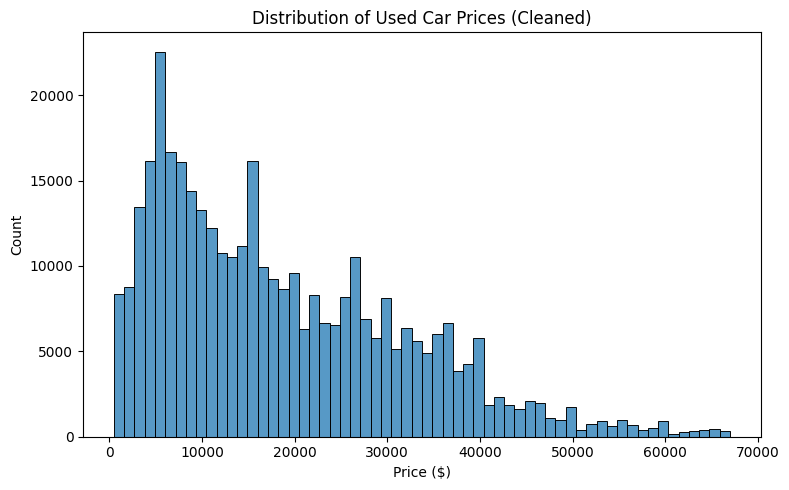

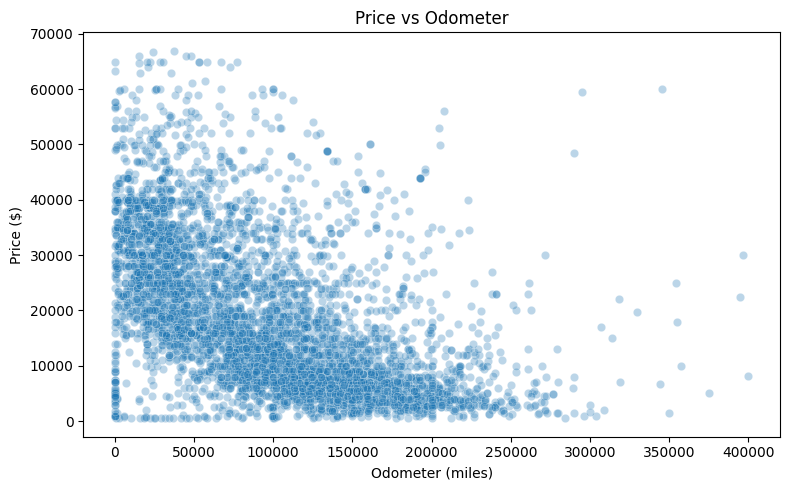

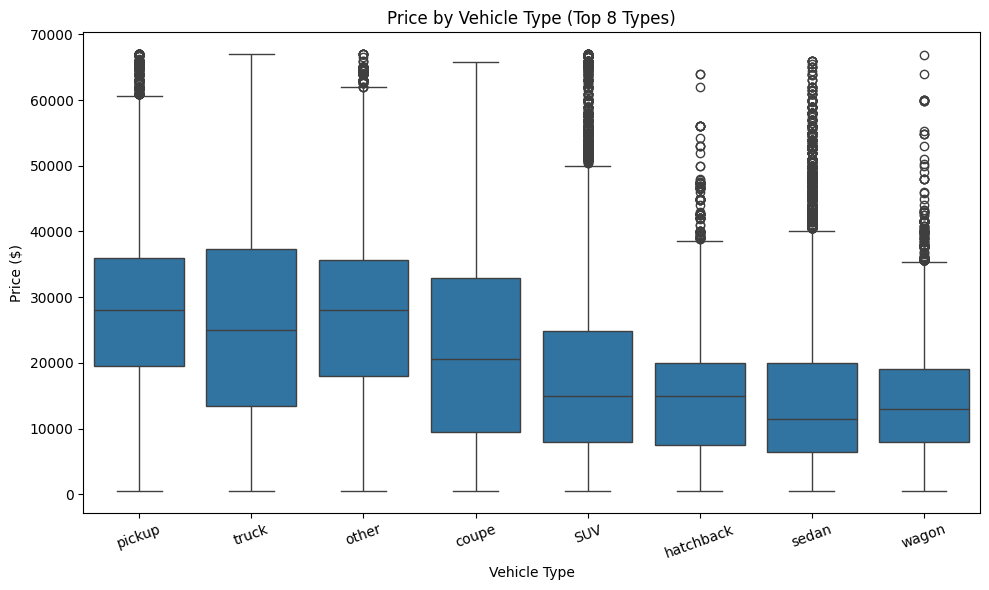

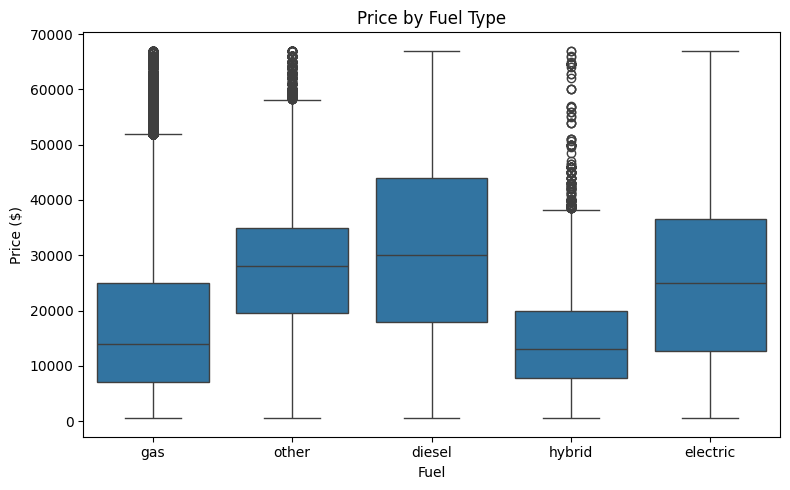

In [27]:
import seaborn as sns


plt.figure(figsize=(8,5))
sns.histplot(df_viz['price'], bins=60)
plt.title('Distribution of Used Car Prices (Cleaned)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

if 'odometer' in df_viz.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df_viz.sample(min(5000, len(df_viz)), random_state=42),
                    x='odometer', y='price', alpha=0.3)
    plt.title('Price vs Odometer')
    plt.xlabel('Odometer (miles)')
    plt.ylabel('Price ($)')
    plt.tight_layout()
    plt.show()

if 'type' in df_viz.columns:
    top_types = df_viz['type'].value_counts().head(8).index
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_viz[df_viz['type'].isin(top_types)],
                x='type', y='price')
    plt.title('Price by Vehicle Type (Top 8 Types)')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

if 'fuel' in df_viz.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_viz, x='fuel', y='price')
    plt.title('Price by Fuel Type')
    plt.xlabel('Fuel')
    plt.ylabel('Price ($)')
    plt.tight_layout()
    plt.show()


In [36]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

df_model = df_viz.copy()
current_year = 2025
df_model['car_age'] = current_year - pd.to_numeric(df_model['year'], errors='coerce')

feature_candidates = [
    'car_age','odometer','manufacturer','model','condition','fuel',
    'transmission','type','paint_color','state'
]
features = [c for c in feature_candidates if c in df_model.columns]

top_n = 200
top_models = df_model['model'].value_counts().head(top_n).index
df_model['model_slim'] = np.where(df_model['model'].isin(top_models), df_model['model'], 'other')
features = [c for c in features if c != 'model'] + ['model_slim']

df_model = df_model.dropna(subset=features + ['price']).copy()

target_rows = 120000
if len(df_model) > target_rows:
    df_model = df_model.sample(n=target_rows, random_state=42)

X = df_model[features].copy()
y = pd.to_numeric(df_model['price'], errors='coerce')

numeric_features = [c for c in ['car_age','odometer'] if c in X.columns]
categorical_features = [c for c in X.columns if c not in numeric_features]

ohe = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[('cat', ohe, categorical_features)],
    remainder='passthrough'
)

lin_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('reg', LinearRegression())
])

rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', RandomForestRegressor(
        n_estimators=150,
        max_depth=18,
        max_features='sqrt',
        min_samples_leaf=3,
        n_jobs=-1,
        random_state=42
    ))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
print("Linear Regression - MAE:", lin_mae, "RMSE:", lin_rmse)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Random Forest      - MAE:", rf_mae, "RMSE:", rf_rmse)




Linear Regression - MAE: 5458.175276073227 RMSE: 7289.698134275474
Random Forest      - MAE: 4565.37556968693 RMSE: 6247.839057758197


In [40]:
lin_cv = -cross_val_score(lin_model, X, y,
                          scoring='neg_mean_absolute_error',
                          cv=5, n_jobs=-1)
print("Linear CV MAE mean:", lin_cv.mean())


Linear CV MAE mean: 5430.50183995934


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [80, 120]
}

rf_gs = GridSearchCV(
    rf_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=2,
    n_jobs=-1,
    verbose=1
)

rf_gs.fit(X_train, y_train)
best_rf = rf_gs.best_estimator_

best_pred = best_rf.predict(X_test)
best_mae = mean_absolute_error(y_test, best_pred)
best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))

print("Best params:", rf_gs.best_params_)
print("Best RF MAE:", best_mae, "Best RF RMSE:", best_rmse)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best params: {'rf__n_estimators': 80}
Best RF MAE: 4607.642972720011 Best RF RMSE: 6296.342730205828


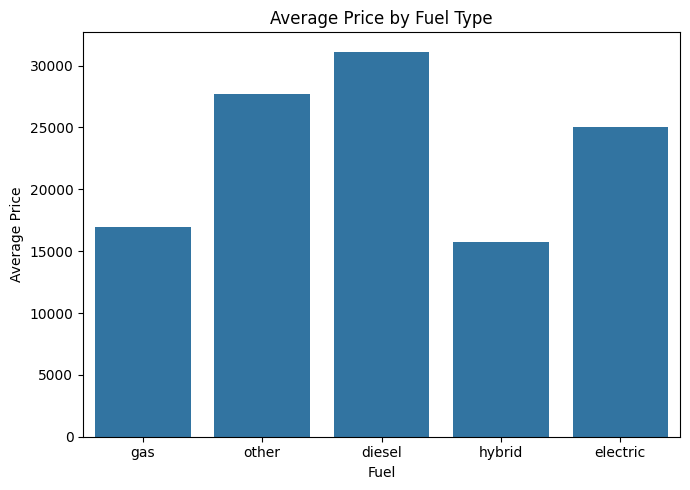

In [45]:
plt.figure(figsize=(7,5))
sns.barplot(x='fuel', y='price', data=df_viz, estimator=np.mean, errorbar=None)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()
